# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
363000,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0415,0.0928,0.1440,0.0244,0,0,0,0
126905,0.0024,0.0024,0.0513,0.0269,0.0024,0.0024,0.0684,0.0977,0.0024,0.0342,1,1,4,4
118497,0.0049,0.2026,0.0464,0.0024,0.0024,0.0024,0.0635,0.0659,0.1929,0.1587,1,1,3,3
308858,0.0928,0.0610,0.1465,0.1074,0.0073,0.0073,0.2271,0.2124,0.0586,0.0586,6,6,7,7
107934,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [24]:
num_classes = 24
input_dim = X.shape[1]

In [35]:
from keras.models import Sequential    
model = Sequential()


model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 48)                528       
                                                                 
 batch_normalization_12 (Bat  (None, 48)               192       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 96)                4704      
                                                                 
 batch_normalization_13 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 192)               18624     
                                                                 
 batch_normalization_14 (Bat  (None, 192)             

# 2. Compile Network

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [42]:
history = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
592/592 [==============================] - 5s 9ms/step - loss: 0.4460 - accuracy: 0.8683 - val_loss: 0.4452 - val_accuracy: 0.8702
Epoch 2/100
592/592 [==============================] - 5s 9ms/step - loss: 0.4356 - accuracy: 0.8716 - val_loss: 0.4408 - val_accuracy: 0.8715
Epoch 3/100
592/592 [==============================] - 5s 9ms/step - loss: 0.4257 - accuracy: 0.8743 - val_loss: 0.4455 - val_accuracy: 0.8732
Epoch 4/100
592/592 [==============================] - 5s 9ms/step - loss: 0.4193 - accuracy: 0.8755 - val_loss: 0.4301 - val_accuracy: 0.8742
Epoch 5/100
592/592 [==============================] - 5s 9ms/step - loss: 0.4113 - accuracy: 0.8786 - val_loss: 0.4277 - val_accuracy: 0.8765
Epoch 6/100
592/592 [==============================] - 5s 8ms/step - loss: 0.4049 - accuracy: 0.8798 - val_loss: 0.4214 - val_accuracy: 0.8784
Epoch 7/100
592/592 [==============================] - 5s 8ms/step - loss: 0.3993 - accuracy: 0.8819 - val_loss: 0.4126 - val_accuracy: 0.8809

Epoch 58/100
592/592 [==============================] - 5s 8ms/step - loss: 0.2833 - accuracy: 0.9166 - val_loss: 0.3322 - val_accuracy: 0.9062
Epoch 59/100
592/592 [==============================] - 5s 8ms/step - loss: 0.2826 - accuracy: 0.9168 - val_loss: 0.3754 - val_accuracy: 0.8940
Epoch 60/100
592/592 [==============================] - 5s 9ms/step - loss: 0.2821 - accuracy: 0.9171 - val_loss: 0.3222 - val_accuracy: 0.9078
Epoch 61/100
592/592 [==============================] - 5s 8ms/step - loss: 0.2805 - accuracy: 0.9176 - val_loss: 0.3487 - val_accuracy: 0.9043
Epoch 62/100
592/592 [==============================] - 5s 8ms/step - loss: 0.2795 - accuracy: 0.9175 - val_loss: 0.3281 - val_accuracy: 0.9068
Epoch 63/100
592/592 [==============================] - 5s 9ms/step - loss: 0.2777 - accuracy: 0.9184 - val_loss: 0.3248 - val_accuracy: 0.9073
Epoch 64/100
592/592 [==============================] - 5s 9ms/step - loss: 0.2801 - accuracy: 0.9174 - val_loss: 0.3289 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

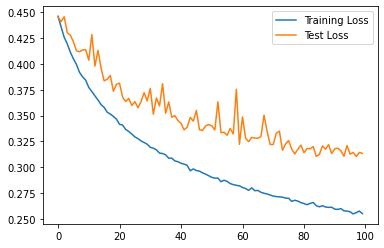

In [43]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

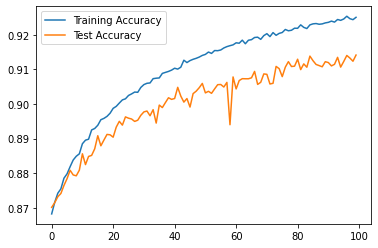

In [44]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 7s 3ms/step - loss: 0.3134 - accuracy: 0.9141


##  4.3 Make Predictions

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions

array([[9.96348858e-01, 3.02820968e-06, 3.70240392e-04, ...,
        3.66902881e-08, 3.70422910e-08, 1.33658133e-07],
       [2.00531228e-13, 1.25534408e-14, 4.74759468e-11, ...,
        2.05957473e-08, 1.62998032e-10, 3.79609705e-10],
       [9.45664406e-01, 1.25513021e-02, 4.93590394e-03, ...,
        2.22675658e-06, 4.41647353e-06, 1.06025596e-04],
       ...,
       [1.32124480e-02, 7.69726569e-07, 1.32084542e-05, ...,
        1.85858241e-07, 4.85851110e-08, 1.36793744e-07],
       [9.86615181e-01, 3.96628806e-04, 9.44535155e-03, ...,
        1.31661237e-09, 1.57903639e-06, 4.16038745e-07],
       [1.51382089e-02, 1.30042117e-05, 2.21015839e-03, ...,
        1.48418073e-12, 5.75759926e-12, 4.25133777e-07]], dtype=float32)